In [2]:
using Gen
using PyPlot

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273


In [3]:
@gen function line_model(xs)
    n = length(xs)
    
    # We begin by sampling a slope and intercept for the line.
    # Before we have seen the data, we don't know the values of
    # these parameters, so we treat them as random choices. The
    # distributions they are drawn from represent our prior beliefs
    # about the parameters: in this case, that neither the slope nor the
    # intercept will be more than a couple points away from 0.
    slope = @trace(normal(0, 1), :slope)
    intercept = @trace(normal(0, 2), :intercept)
    
    # Given the slope and intercept, we can sample y coordinates
    # for each of the x coordinates in our input vector.
    for (i, x) in enumerate(xs)
        @trace(normal(slope * x + intercept, 0.1), (:y, i))
    end
    
    # The return value of the model is often not particularly important,
    # Here, we simply return n, the number of points.
    return n
end

DynamicDSLFunction{Any}(Dict{Symbol,Any}(), Dict{Symbol,Any}(), Type[Any], ##line_model#402, Bool[0], false)

In [11]:
xs = -5:5 |> collect
trace = Gen.simulate(line_model, (xs,))
println(trace)

Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}(DynamicDSLFunction{Any}(Dict{Symbol,Any}(), Dict{Symbol,Any}(), Type[Any], ##line_model#402, Bool[0], false), Trie{Any,Gen.ChoiceOrCallRecord}(Dict{Any,Gen.ChoiceOrCallRecord}((:y, 7) => Gen.ChoiceOrCallRecord{Float64}(-1.1227789994154513, -1.3540958632019027, NaN, true),(:y, 9) => Gen.ChoiceOrCallRecord{Float64}(-3.277533239353574, 1.3818201916247348, NaN, true),(:y, 1) => Gen.ChoiceOrCallRecord{Float64}(4.383158089038713, 1.38276283184449, NaN, true),(:y, 10) => Gen.ChoiceOrCallRecord{Float64}(-4.172581439188927, 1.2253620324213168, NaN, true),(:y, 5) => Gen.ChoiceOrCallRecord{Float64}(0.5429874946230527, 1.3724731093170992, NaN, true),(:y, 4) => Gen.ChoiceOrCallRecord{Float64}(1.5176002873396228, 1.3833803420898922, NaN, true),:intercept => Gen.ChoiceOrCallRecord{Float64}(-0.3994200821754659, -1.63202776402025, NaN, true),(:y, 3) => Gen.ChoiceOrCallRecord{Float64}(2.536948412240105, 1.1769276898448322, NaN, true),(:y, 6) => Gen.ChoiceOrCa

In [10]:
println(Gen.get_choices(trace))

│
├── (:y, 7) : 1.8932483113534988
│
├── (:y, 9) : 1.8686993829495662
│
├── (:y, 1) : 2.210889218177331
│
├── (:y, 10) : 1.8766687982506418
│
├── (:y, 5) : 1.9788993656003098
│
├── (:y, 4) : 2.0999106628993824
│
├── :intercept : 1.935518910162004
│
├── (:y, 3) : 2.1327148859612595
│
├── (:y, 6) : 1.8941715739391012
│
├── (:y, 8) : 2.0681916098531947
│
├── (:y, 11) : 1.588377490466504
│
├── (:y, 2) : 2.1102918303254645
│
└── :slope : -0.037931185781727966



In [12]:
function render_trace(trace; show_data=true)
    # Pull out xs from the trace
    xs = Gen.get_args(trace)[1]
    
    xmin = minimum(xs)
    xmax = maximum(xs)
    
    if show_data
        ys = [trace[(:y, i)] for i=1:length(xs)]
        scatter(xs, ys, c="black")
    end
    
    # Pull out slope and intercept from the trace
    slope = trace[:slope]
    intercept = trace[:intercept]
    
    # Draw the line
    plot([xmin, xmax], slope *  [xmin, xmax] .+ intercept, color="black", alpha=0.5)
    ax = gca()
    ax[:set_xlim]((xmin, xmax))
    ax[:set_ylim]((xmin, xmax))
end

render_trace (generic function with 1 method)

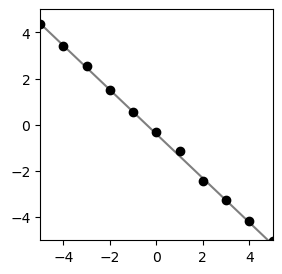

(-5, 5)

In [16]:
figure(figsize=(3,3))
render_trace(trace)

In [17]:
function grid(renderer, traces; ncols=6, nrows=3)
    figure(figsize=(16, 8))
    for (i, trace) in enumerate(traces)
        subplot(nrows, ncols, i)
        renderer(trace)
    end
end

grid (generic function with 1 method)

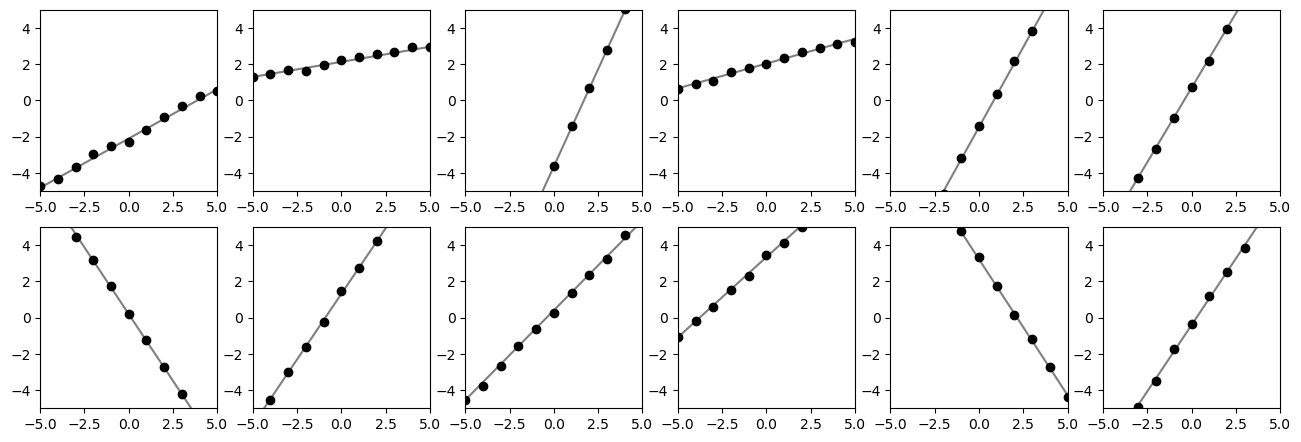

In [18]:
traces = [Gen.simulate(line_model, (xs,)) for _  in 1:12]
grid(render_trace, traces)

In [19]:
@gen function sine_model(xs)
    n = length(xs)
    
    phase = @trace(uniform(0, 2π), :phase)
    period = @trace(gamma(5, 1), :period)
    amplitude = @trace(gamma(1, 1), :amplitude)
    
    for (i, x) in enumerate(xs)
        mu = amplitude * sin(2π * x / period + phase)
        @trace(normal(mu, 0.1), (:y, i))
    end
    
    return n
end

DynamicDSLFunction{Any}(Dict{Symbol,Any}(), Dict{Symbol,Any}(), Type[Any], ##sine_model#403, Bool[0], false)

In [20]:
function render_sine_trace(trace; show_data=true)
    xs = get_args(trace)[1]
    
    xmin = minimum(xs)
    xmax = maximum(xs)
    
    if show_data
        ys = [trace[(:y, i)] for i=1:length(xs)]
        scatter(xs, ys, c="black")
    end
    
    phase = trace[:phase]
    period = trace[:period]
    amplitude = trace[:amplitude]
    
    test_points = collect(range(xmin, stop=xmax, length=100))
    plot(test_points, amplitude * sin.(2π * test_points / period .+ phase))
    
    ax = gca()
    ax[:set_xlim]((xmin, xmax))
    ax[:set_ylim]((xmin, xmax))
end

render_sine_trace (generic function with 1 method)

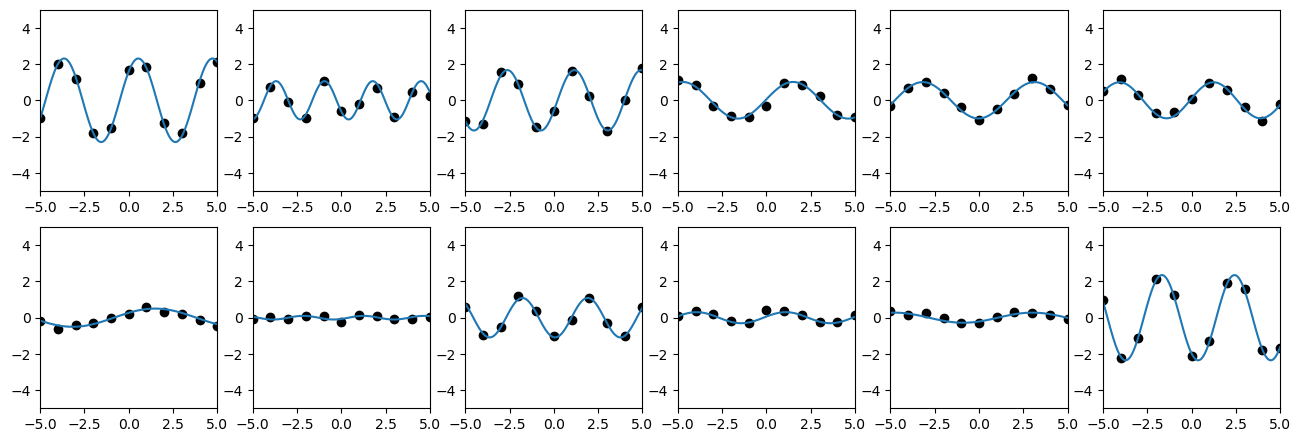

In [22]:
traces = [Gen.simulate(sine_model, (xs,)) for _ in 1:12]

figure(figsize=(16, 8))
for (i, trace) in enumerate(traces)
    subplot(3, 6, i)
    render_sine_trace(trace)
end

In [23]:
ys = [6.75003, 6.1568, 4.26414, 1.84894, 3.09686, 1.94026, 1.36411, -0.83959, -0.976, -1.93363, -2.91303]

11-element Array{Float64,1}:
  6.75003
  6.1568 
  4.26414
  1.84894
  3.09686
  1.94026
  1.36411
 -0.83959
 -0.976  
 -1.93363
 -2.91303

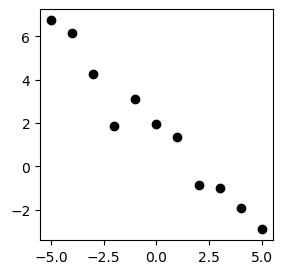

PyObject <matplotlib.collections.PathCollection object at 0x7fd703926690>

In [24]:
figure(figsize=(3,3))
scatter(xs, ys, color="black")

In [26]:
function do_inference(model, xs, ys, amount_of_computation)
    # Create a choice map that maps model addresses (:y, i)
    # to observed values ys[i]. We leave :slope and :intercept
    # unconstrained, because we want them to be inferred.
    observations = Gen.choicemap()
    
    for (i, y) in enumerate(ys)
        observations[(:y, i)] = y
    end
    
    # Call importance_resampling to obtain a likely trace consistent
    # with our observations.
    (trace, _) = Gen.importance_resampling(model, (xs,), observations, amount_of_computation)
    return trace
end

do_inference (generic function with 1 method)

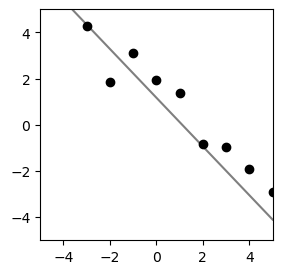

(-5, 5)

In [43]:
trace = do_inference(line_model, xs, ys, 100)

figure(figsize=(3,3))
render_trace(trace)

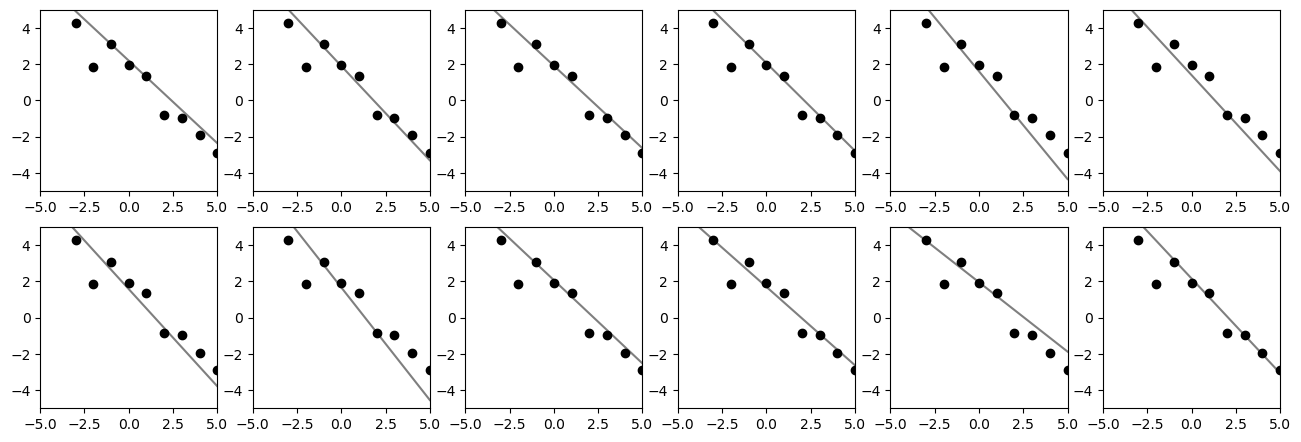

In [45]:
traces = [do_inference(line_model, xs, ys, 100) for _ in 1:12]
grid(render_trace, traces)

In [41]:
function overlay(renderer, traces; same_data=true, args...)
    renderer(traces[1], show_data=true, args...)
    for i=2:length(traces)
        renderer(traces[i], show_data=!same_data, args...)
    end
end

overlay (generic function with 1 method)

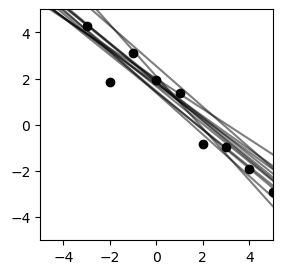

In [49]:
traces = [do_inference(line_model, xs, ys, 100) for _ in 1:12]
figure(figsize=(3,3))
overlay(render_trace, traces)

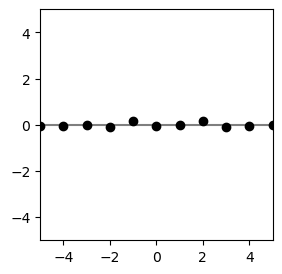

(-5, 5)

In [50]:
constraints = Gen.choicemap()
constraints[:slope] = 0.
constraints[:intercept] = 0.
(trace, _) = Gen.generate(line_model, (xs,), constraints)
figure(figsize=(3,3))
render_trace(trace)

In [51]:
function predict_new_data(model, trace, new_xs, param_addrs)
    # Copy parameter values from the inferred trace (`trace`)
    # into a fresh set of constraints.
    constraints = Gen.choicemap()
    for addr in param_addrs
        constraints[addr] = trace[addr]
    end
    
    # Run the model with new x coordinates, and with parameters 
    # fixed to be the inferred values
    (new_trace, _) = Gen.generate(model, (new_xs,), constraints)
    
    # Pull out the y-values and return them
    ys = [new_trace[(:y, i)] for i=1:length(new_xs)]
    return ys
end

predict_new_data (generic function with 1 method)

In [52]:
function infer_and_predict(model, xs, ys, new_xs, param_addrs, num_traces, amount_of_computation)
    pred_ys = []
    for i in 1:num_traces
        trace = do_inference(model, xs, ys, amount_of_computation)
        push!(pred_ys, predict_new_data(model, trace, new_xs, param_addrs))
    end
    return pred_ys
end

infer_and_predict (generic function with 1 method)

In [53]:
function plot_predictions(xs, ys, new_xs, pred_ys)
    scatter(xs, ys, color="red")
    for pred_ys_single in pred_ys
        scatter(new_xs, pred_ys_single, color="black", s=1, alpha=0.3)
    end
end

plot_predictions (generic function with 1 method)

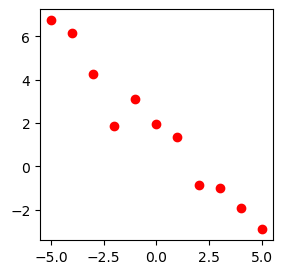

PyObject <matplotlib.collections.PathCollection object at 0x7fd703aca990>

In [54]:
figure(figsize=(3,3))
scatter(xs, ys, color="red")

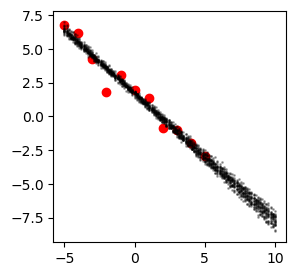

In [56]:
new_xs = collect(range(-5, stop=10, length=100))
pred_ys = infer_and_predict(line_model, xs, ys, new_xs, [:slope, :intercept], 20, 1000)
figure(figsize=(3,3))
plot_predictions(xs, ys, new_xs, pred_ys)

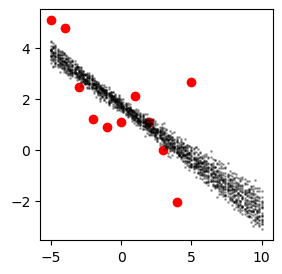

In [58]:
ys_noisy = [5.092, 4.781, 2.46815, 1.23047, 0.903318, 1.11819, 2.10808, 1.09198, 0.0203789, -2.05068, 2.66031]
pred_ys = infer_and_predict(line_model, xs, ys_noisy, new_xs, [:slope, :intercept], 20, 1000)
figure(figsize=(3,3))
plot_predictions(xs, ys_noisy, new_xs, pred_ys)

In [59]:
@gen function line_model_2(xs)
    n = length(xs)
    
    slope = @trace(normal(0, 1), :slope)
    intercept = @trace(normal(0, 2), :intercept)
    noise = @trace(gamma(1, 1), :noise)
    
    for (i, x) in enumerate(xs)
        @trace(normal(slope * x + intercept, noise), (:y, i))
    end
    
    return nothing
end

DynamicDSLFunction{Any}(Dict{Symbol,Any}(), Dict{Symbol,Any}(), Type[Any], ##line_model_2#404, Bool[0], false)

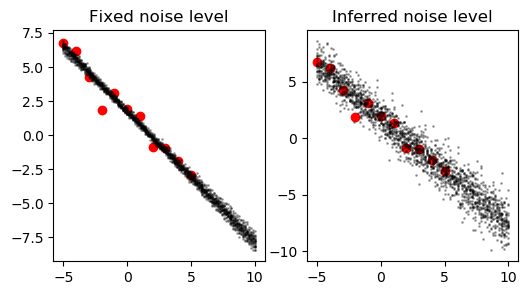

In [60]:
figure(figsize=(6,3))

pred_ys = infer_and_predict(line_model, xs, ys, new_xs, [:slope, :intercept], 20, 1000)
subplot(1, 2, 1)
title("Fixed noise level")
plot_predictions(xs, ys, new_xs, pred_ys)

pred_ys = infer_and_predict(line_model_2, xs, ys, new_xs, [:slope, :intercept, :noise], 20, 10000)
subplot(1, 2, 2)
title("Inferred noise level")
plot_predictions(xs, ys, new_xs, pred_ys)

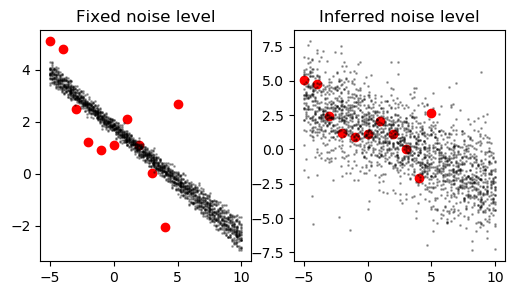

In [61]:
figure(figsize=(6,3))

pred_ys = infer_and_predict(line_model, xs, ys_noisy, new_xs, [:slope, :intercept], 20, 1000)
subplot(1, 2, 1)
title("Fixed noise level")
plot_predictions(xs, ys_noisy, new_xs, pred_ys)

pred_ys = infer_and_predict(line_model_2, xs, ys_noisy, new_xs, [:slope, :intercept, :noise], 20, 10000)
subplot(1, 2, 2)
title("Inferred noise level")
plot_predictions(xs, ys_noisy, new_xs, pred_ys)

In [62]:
@gen function sine_model_2(xs)
    n = length(xs)
    
    phase = @trace(uniform(0, 2 * pi), :phase)
    period = @trace(gamma(5, 1), :period)
    amplitude = @trace(gamma(1, 1), :amplitude)
    noise = @trace(gamma(1, 1), :noise)
    
    for (i, x) in enumerate(xs)
        mu = amplitude * sin(2 * pi * x / period + phase)
        @trace(normal(mu, noise), (:y, i))
    end
    
    return n
end

DynamicDSLFunction{Any}(Dict{Symbol,Any}(), Dict{Symbol,Any}(), Type[Any], ##sine_model_2#405, Bool[0], false)

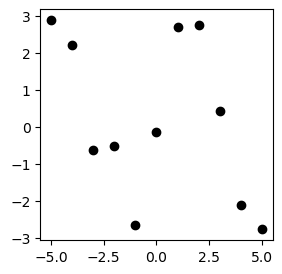

PyObject <matplotlib.collections.PathCollection object at 0x7fd703b266d0>

In [64]:
ys_sine = [2.89, 2.22, -0.612, -0.522, -2.65, -0.133, 2.70, 2.77, 0.425, -2.11, -2.76]

figure(figsize=(3, 3));
scatter(xs, ys_sine, color="black")

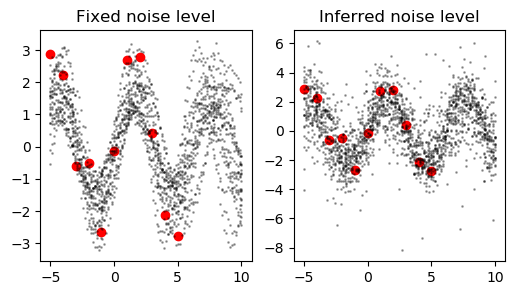

In [65]:
figure(figsize=(6,3))

pred_ys = infer_and_predict(sine_model, xs, ys_sine, new_xs, [:phase, :period, :amplitude], 20, 100)

subplot(1, 2, 1)
title("Fixed noise level")
plot_predictions(xs, ys_sine, new_xs, pred_ys)

pred_ys = infer_and_predict(sine_model_2, xs, ys_sine, new_xs, [:phase, :period, :amplitude, :noise], 20, 1000)

subplot(1, 2, 2)
title("Inferred noise level")
plot_predictions(xs, ys_sine, new_xs, pred_ys)

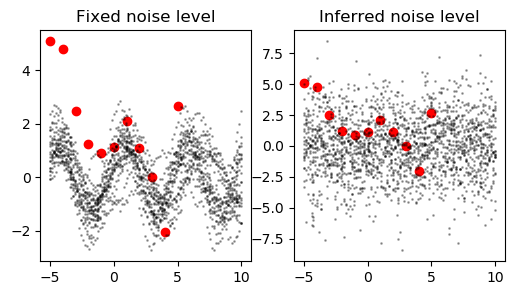

In [66]:
figure(figsize=(6,3))

pred_ys = infer_and_predict(sine_model, xs, ys_noisy, new_xs, [:phase, :period, :amplitude], 20, 100)

subplot(1, 2, 1)
title("Fixed noise level")
plot_predictions(xs, ys_noisy, new_xs, pred_ys)

pred_ys = infer_and_predict(sine_model_2, xs, ys_noisy, new_xs, [:phase, :period, :amplitude, :noise], 20, 1000)

subplot(1, 2, 2)
title("Inferred noise level")
plot_predictions(xs, ys_noisy, new_xs, pred_ys)

In [77]:
@gen function foo()
    @trace(normal(0, 1), :y)
end

@gen function bar()
    @trace(bernoulli(0.5), :x)
    @trace(foo())
end

@gen function bar_using_namespace()
    @trace(bernoulli(0.5), :x)
    @trace(foo(), :z)
end

DynamicDSLFunction{Any}(Dict{Symbol,Any}(), Dict{Symbol,Any}(), Type[], ##bar_using_namespace#411, Bool[], false)

In [84]:
trace = Gen.simulate(bar_using_namespace, ())
println(Gen.get_choices(trace))

│
├── :x : true
│
└── :z
    │
    └── :y : -0.7602164111010442



In [85]:
@gen function combined_model(xs)
    if @trace(bernoulli(0.5), :is_line)
        @trace(line_model_2(xs))
    else
        @trace(sine_model_2(xs))
    end
end

DynamicDSLFunction{Any}(Dict{Symbol,Any}(), Dict{Symbol,Any}(), Type[Any], ##combined_model#412, Bool[0], false)

In [86]:
function render_combined(trace; show_data=true)
    if trace[:is_line]
        render_trace(trace, show_data=show_data)
    else
        render_sine_trace(trace, show_data=show_data)
    end
end

render_combined (generic function with 1 method)

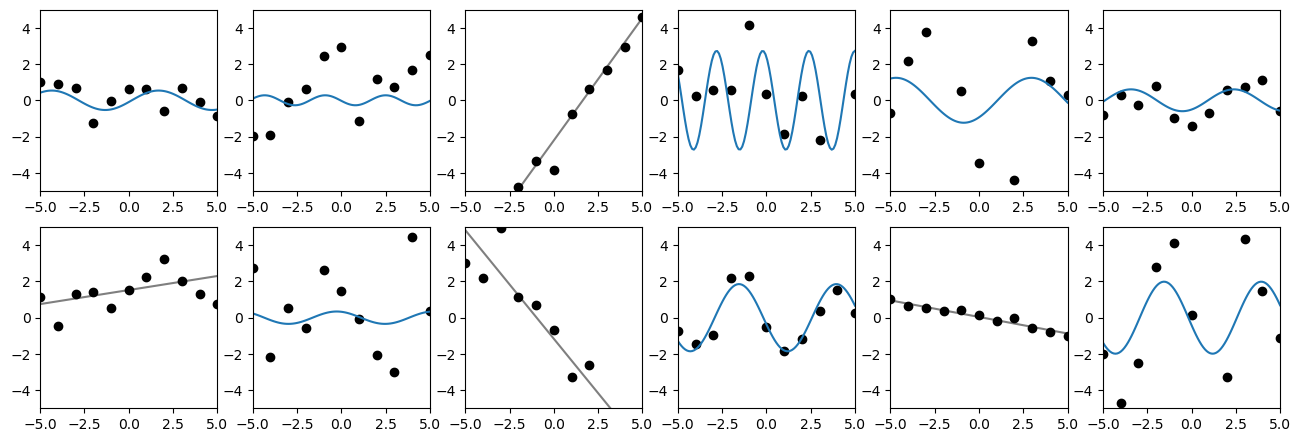

In [88]:
traces = [Gen.simulate(combined_model, (xs,)) for _=1:12];
grid(render_combined, traces)

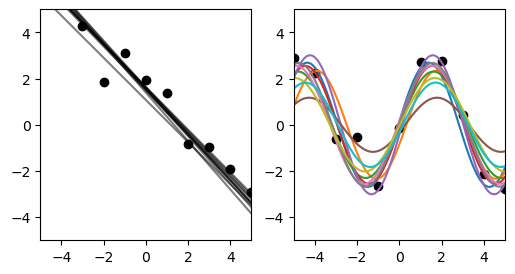

In [87]:
figure(figsize=(6,3))
subplot(1, 2, 1)
traces = [do_inference(combined_model, xs, ys, 10000) for _=1:10];
overlay(render_combined, traces)
subplot(1, 2, 2)
traces = [do_inference(combined_model, xs, ys_sine, 10000) for _=1:10];
overlay(render_combined, traces)

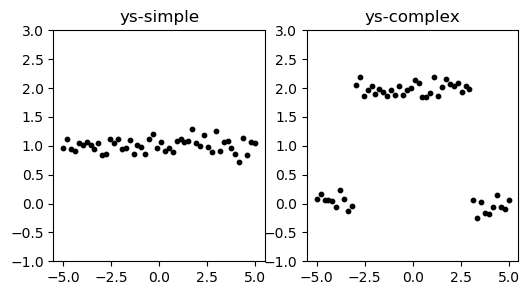

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[90]:10
└ @ Core In[90]:10
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[90]:15
└ @ Core In[90]:15


(-1, 3)

In [90]:
xs_dense = collect(range(-5, stop=5, length=50))
ys_simple = fill(1., length(xs_dense)) .+ randn(length(xs_dense)) * 0.1
ys_complex = [Int(floor(abs(x/3))) % 2 == 0 ? 2 : 0 for x in xs_dense] .+ randn(length(xs_dense)) * 0.1;

figure(figsize=(6,3))

subplot(1, 2, 1)
title("ys-simple")
scatter(xs_dense, ys_simple, color="black", s=10)
gca()[:set_ylim]((-1, 3))

subplot(1, 2, 2)
title("ys-complex")
scatter(xs_dense, ys_complex, color="black", s=10)
gca()[:set_ylim]((-1, 3))

In [91]:
struct Interval
    l::Float64
    u::Float64
end

abstract type Node end
    
struct InternalNode <: Node
    left::Node
    right::Node
    interval::Interval
end

struct LeafNode <: Node
    value::Float64
    interval::Interval
end

In [92]:
@gen function generate_segments(l::Float64, u::Float64)
    interval = Interval(l, u)
    if @trace(bernoulli(0.7), :isleaf)
        value = @trace(normal(0, 1), :value)
        return LeafNode(value, interval)
    else
        frac = @trace(beta(2, 2), :frac)
        mid  = l + (u - l) * frac
        left = @trace(generate_segments(l, mid), :left)
        right = @trace(generate_segments(mid, u), :right)
        return InternalNode(left, right, interval)
    end
end

DynamicDSLFunction{Any}(Dict{Symbol,Any}(), Dict{Symbol,Any}(), Type[Float64, Float64], ##generate_segments#413, Bool[0, 0], false)

In [93]:
function render_node(node::LeafNode)
    plot([node.interval.l, node.interval.u], [node.value, node.value])
end

function render_node(node::InternalNode)
    render_node(node.left)
    render_node(node.right)
end

function render_segments_trace(trace)
    node = get_retval(trace)
    render_node(node)
    ax = gca()
    ax[:set_xlim]((0, 1))
    ax[:set_ylim]((-3, 3))
end

render_segments_trace (generic function with 1 method)

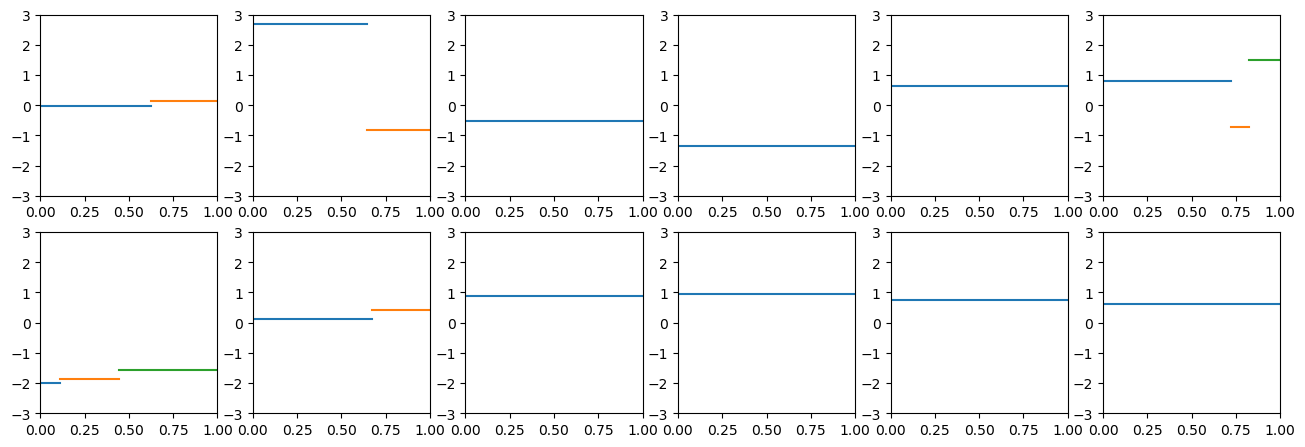

In [95]:
traces = [Gen.simulate(generate_segments, (0., 1.)) for i=1:12]
grid(render_segments_trace, traces)

In [96]:
# get_value_at searches a binary tree for
# the leaf node containing some value.
function get_value_at(x::Float64, node::LeafNode)
    @assert x >= node.interval.l && x <= node.interval.u
    return node.value
end

function get_value_at(x::Float64, node::InternalNode)
    @assert x >= node.interval.l && x <= node.interval.u
    if x <= node.left.interval.u
        get_value_at(x, node.left)
    else
        get_value_at(x, node.right)
    end
end

# Out full model
@gen function changepoint_model(xs::Vector{Float64})
    node = @trace(generate_segments(minimum(xs), maximum(xs)), :tree)
    noise = @trace(gamma(1, 1), :noise)
    for (i, x) in enumerate(xs)
        @trace(normal(get_value_at(x, node), noise), (:y, i))
    end
    return node
end

DynamicDSLFunction{Any}(Dict{Symbol,Any}(), Dict{Symbol,Any}(), Type[Array{Float64,1}], ##changepoint_model#414, Bool[0], false)

In [97]:
function render_changepoint_model_trace(trace; show_data=true)
    xs = Gen.get_args(trace)[1]
    node = Gen.get_retval(trace)
    render_node(node)
    if show_data
        ys = [trace[(:y, i)] for i=1:length(xs)]
        scatter(xs, ys, c="black")
    end
    ax = gca()
    ax[:set_xlim]((minimum(xs), maximum(xs)))
    ax[:set_ylim]((-3, 3))
end

render_changepoint_model_trace (generic function with 1 method)

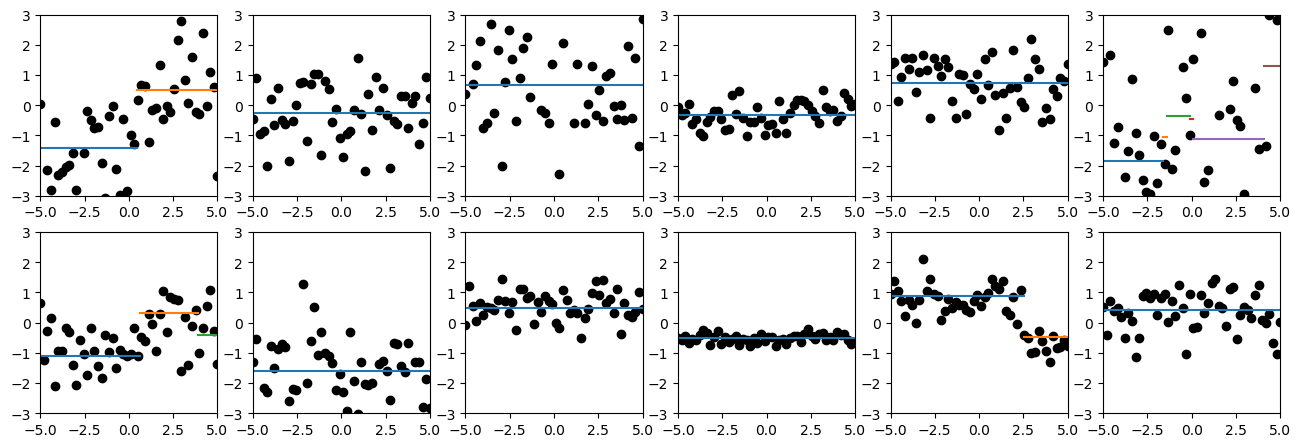

In [99]:
traces = [Gen.simulate(changepoint_model, (xs_dense,)) for i=1:12]
grid(render_changepoint_model_trace, traces)

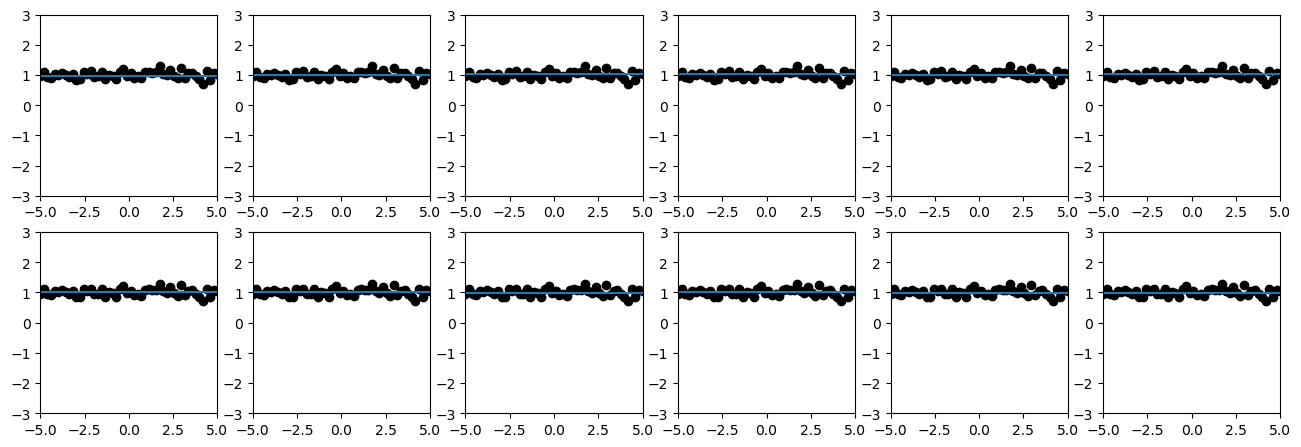

In [100]:
traces = [do_inference(changepoint_model, xs_dense, ys_simple, 10000) for _=1:12];
grid(render_changepoint_model_trace, traces)

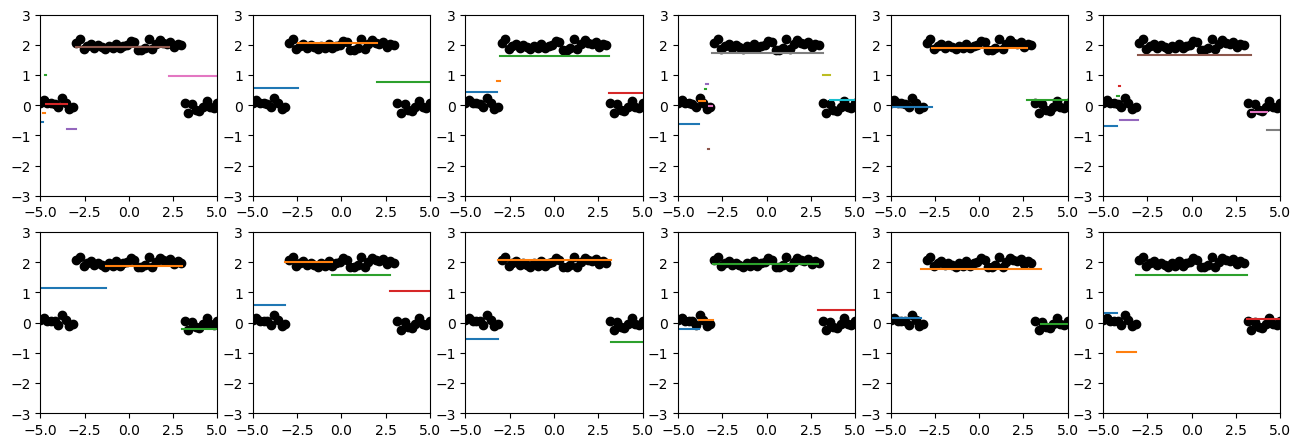

In [101]:
traces = [do_inference(changepoint_model, xs_dense, ys_complex, 100000) for _=1:12];
grid(render_changepoint_model_trace, traces)